In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_corr(res_file, dict_corr, layer, dim):
    corr = np.load(res_file)
    corr_valid = corr[~np.isnan(corr)]
    if len(corr_valid) != 0:
        dict_corr["correlation"] += list(corr_valid)
        dict_corr["layer"] += [layer]*len(corr_valid)
        dict_corr["dimension"] += [dim]*len(corr_valid)
    return dict_corr

res_path_sz = "/data/users4/xli/interpolation/results/sfnc_sz/ivae/hypopt"
res_path_asd = "/data/users4/xli/interpolation/results/sfnc_asd/ivae/hypopt"
layer_list = [2, 3, 4]
dim_list = [16, 32, 64, 96]
seed_list = list(range(10))

dict_corr_train_sz = {"correlation": [], "layer": [], "dimension": []}
dict_corr_test_sz = {"correlation": [], "layer": [], "dimension": []}
dict_corr_train_asd = {"correlation": [], "layer": [], "dimension": []}
dict_corr_test_asd = {"correlation": [], "layer": [], "dimension": []}

for l, layer in enumerate(layer_list):
    for d, dim in enumerate(dim_list):
        for s, seed in enumerate(seed_list):
            res_file_train_sz = f"{res_path_sz}/layer{layer}_dim{dim}_seed{seed}/corr.npy"
            dict_corr_train_sz = load_corr(res_file_train_sz, dict_corr_train_sz, layer, dim)
            res_file_test_sz = f"{res_path_sz}/layer{layer}_dim{dim}_seed{seed}/corr_test.npy"
            dict_corr_test_sz = load_corr(res_file_test_sz, dict_corr_test_sz, layer, dim)
            res_file_train_asd = f"{res_path_asd}/layer{layer}_dim{dim}_seed{seed}/corr.npy"
            dict_corr_train_asd = load_corr(res_file_train_asd, dict_corr_train_asd, layer, dim)
            res_file_test_asd = f"{res_path_asd}/layer{layer}_dim{dim}_seed{seed}/corr_test.npy"
            dict_corr_test_asd = load_corr(res_file_test_asd, dict_corr_test_asd, layer, dim)

df_train_sz = pd.DataFrame(data=dict_corr_train_sz)
df_test_sz = pd.DataFrame(data=dict_corr_test_sz)
df_train_asd = pd.DataFrame(data=dict_corr_train_asd)
df_test_asd = pd.DataFrame(data=dict_corr_test_asd)
df_list = [df_train_sz, df_test_sz, df_train_asd, df_test_asd]

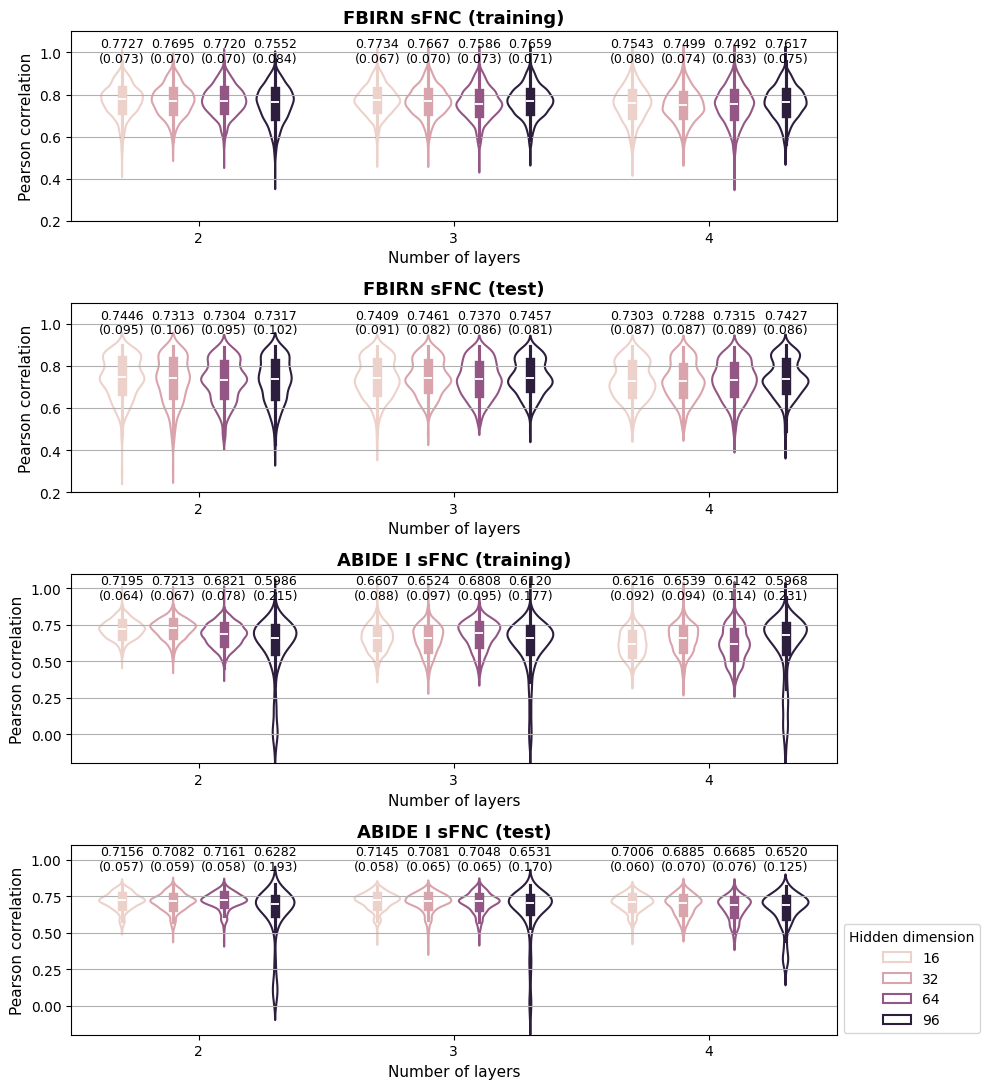

In [3]:
title_fontsize = 13
label_fontsize = 11

title_list = ["FBIRN sFNC (training)", "FBIRN sFNC (test)", "ABIDE I sFNC (training)", "ABIDE I sFNC (test)"]

fig, axes = plt.subplots(4, 1, figsize=(10, 11))
for i in range(4):
    ax = axes[i]
    ax.grid(True, axis='y')
    if i < 3:
        sns.violinplot(data=df_list[i], x="layer", y="correlation", hue="dimension", fill=False, gap=.1, ax=ax, legend=False)
    else:
        sns.violinplot(data=df_list[i], x="layer", y="correlation", hue="dimension", fill=False, gap=.1, ax=ax)
    means = df_list[i].groupby(["layer", "dimension"])["correlation"].mean()
    stds = df_list[i].groupby(["layer", "dimension"])["correlation"].std()
    ax.set_title(title_list[i], fontweight='bold', fontsize=title_fontsize)
    ax.set_xlabel("Number of layers", fontsize=label_fontsize)
    ax.set_ylabel("Pearson correlation", fontsize=label_fontsize)
    if i == 3:
        ax.legend(title="Hidden dimension", bbox_to_anchor=(1, 0.62))
    if i < 2:
        ax.set_ylim([0.2, 1.1])
    else:
        ax.set_ylim([-0.2, 1.1])
    for l, layer in enumerate(layer_list):
        for d, dim in enumerate(dim_list):
            j = l + d*0.2 - 0.3
            if i < 2:
                k = 0.94
            else:
                k = 0.91
            ax.text(j, 1.01, f"{means[layer,dim]:.4f}", ha='center', va='bottom', color='k', fontsize=9)
            ax.text(j, k, f"({stds[layer,dim]:.3f})", ha='center', va='bottom', color='k', fontsize=9)

plt.tight_layout()
plt.savefig("hypopt_sfnc_ivae.pdf")